In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataasli = pd.read_csv("april.csv")
dataasli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9433 entries, 0 to 9432
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tanggal     9433 non-null   object
 1   waktu       9433 non-null   object
 2   ketinggian  9433 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 221.2+ KB


In [3]:
#cek data hilang
dataasli.isnull().sum()

tanggal       0
waktu         0
ketinggian    0
dtype: int64

In [4]:
dataasli.dtypes

tanggal       object
waktu         object
ketinggian     int64
dtype: object

In [5]:
dataasli.describe()

,ketinggian
count,9433.000000
mean,110.825718
std,54.422772
min,-33.000000
25%,73.000000
50%,115.000000
75%,149.000000
max,262.000000


In [6]:
dataasli.duplicated().sum()

0

<Axes: ylabel='ketinggian'>

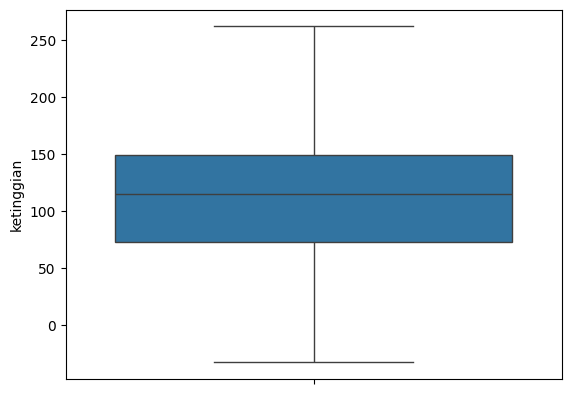

In [7]:
#cek outlier
import seaborn as sns
sns.boxplot(y=dataasli['ketinggian'])

In [8]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install statsmodels pmdarima

Note: you may need to restart the kernel to use updated packages.


In [10]:
#cek data stationer atau tidak 
from statsmodels.tsa.stattools import adfuller
def adfuller_test(tinggi):
  result=adfuller(tinggi)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
  for value,label in zip(result,labels):
    print(label+' : '+str(value) )
  if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho),Data is stationary")
  else:
    print("weak evidence against null hypothesis,indicating it is non- stationary ")
adfuller_test(dataasli['ketinggian'])

ADF Test Statistic : -3.398124521210949
p-value : 0.011022972945383866
#Lags Used : 38
Number of Observations : 9394
strong evidence against the null hypothesis(Ho),Data is stationary


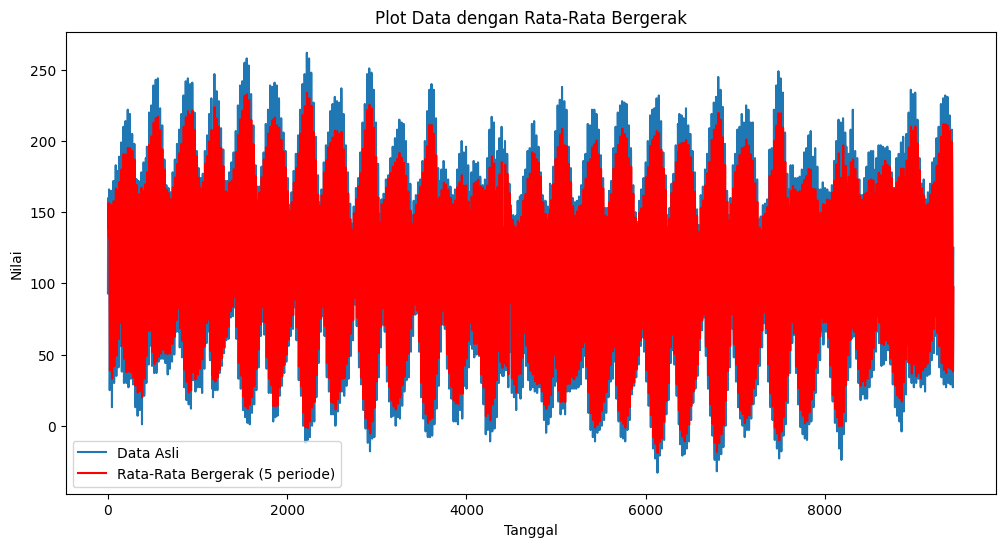

In [11]:

# Rata-Rata Bergerak
window_size = 5
dataasli['b'] = dataasli['ketinggian'].rolling(window=window_size).mean()

# Plot data asli dan rata-rata bergerak
plt.figure(figsize=(12, 6))
plt.plot(dataasli.index, dataasli['ketinggian'], label='Data Asli')
plt.plot(dataasli.index, dataasli['b'], label=f'Rata-Rata Bergerak ({window_size} periode)', color='red')
plt.title('Plot Data dengan Rata-Rata Bergerak')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.show()

Text(0, 0.5, 'ketinggian')

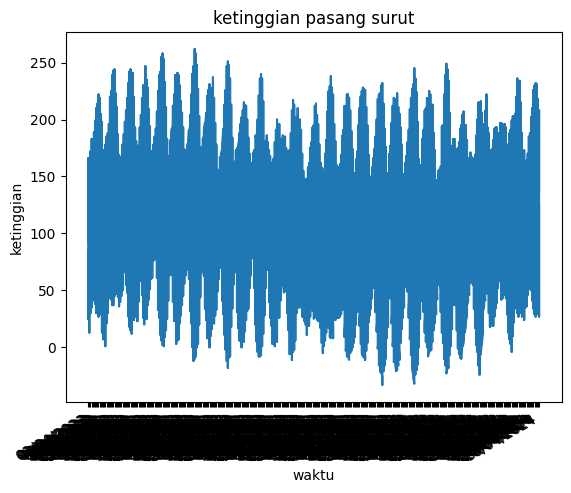

In [12]:
#grafik data
plt.plot(dataasli.tanggal, dataasli.ketinggian)
plt.title('ketinggian pasang surut')
plt.xticks(rotation=30, ha='right')
plt.xlabel('waktu')
plt.ylabel('ketinggian')

In [13]:
#perhitugan data training (80% dari total data)
trainsize = int(len(dataasli["ketinggian"]) * 0.8)

#pisah data training dan data testing
train = dataasli.iloc[:trainsize]
test = dataasli.iloc[trainsize:]
train

,tanggal,waktu,ketinggian,b
0,01/04/2023,00:00:00,93,NaN
1,01/04/2023,01:00:00,129,NaN
2,01/04/2023,02:00:00,153,NaN
3,01/04/2023,03:00:00,160,NaN
4,01/04/2023,04:00:00,159,138.8
...,...,...,...,...
7541,12/02/2024,04:00:00,118,39.8
7542,12/02/2024,05:00:00,151,71.4
7543,12/02/2024,06:00:00,150,101.2
7544,12/02/2024,07:00:00,144,125.2


In [14]:
#normalisasi training dan testing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train[['ketinggian']])
test = scaler.fit_transform(test[['ketinggian']])
test

array([[0.58461538],
       [0.53076923],
       [0.47307692],
       ...,
       [0.47692308],
       [0.53846154],
       [0.57307692]])

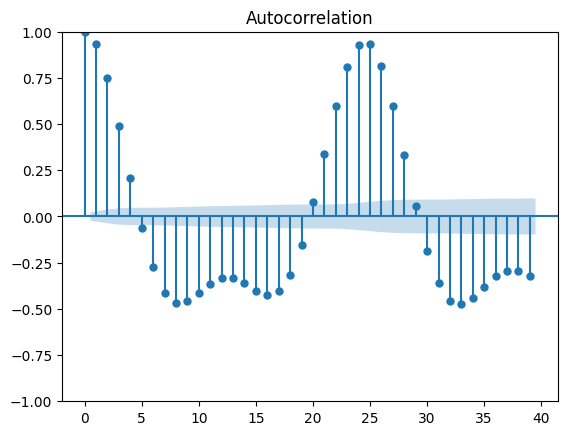

In [15]:
#parameter p
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train).show()

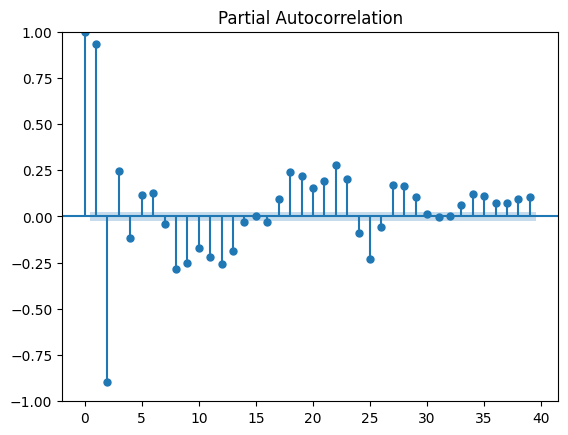

In [16]:
#parameter q
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train).show()

In [17]:
####### sarimax coba 

In [18]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model2 = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',      
                      max_p=5, max_q=5, 
                      m=365,              
                      d=None,           
                      seasonal=False,   
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model2.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (365) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-25780.086, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11574.815, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1375.459, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-29969.010, Time=1.83 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-28158.450, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-30923.628, Time=3.58 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-30512.784, Time=0.79 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-30514.722, Time=2.61 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=4.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-30185.086, Time=1.59 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-30559.367, Time=1.00 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=4.33 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-32067.841, Time=6.96 sec
 ARIMA(2,0,1)(0,0,0)[0] inter

In [19]:
#fit ke data pelatihan
model2.fit(train)

ARIMA(order=(3, 0, 2), scoring_args={}, suppress_warnings=True)

In [20]:
#data prediksi
future = model2.predict(n_periods=len(test))
future

array([0.53648003, 0.51104813, 0.49215398, ..., 0.48523971, 0.48523971,
       0.48523971])

In [21]:
#cek error
from sklearn import metrics
mae = metrics.mean_absolute_error(test, future)
mse = metrics.mean_squared_error(test, future)
rmse = np.sqrt(mse)

In [22]:
print (mae)
print (mse)
print (rmse)

0.16954081277990116
0.04078850975464347
0.20196165416891265


In [23]:
minggu = len(test) + 168
p1minggu = model2.predict(n_periods=minggu)
print(p1minggu)

[0.53648003 0.51104813 0.49215398 ... 0.48523971 0.48523971 0.48523971]


In [24]:
trainasli = scaler.inverse_transform(train)
testasli = scaler.inverse_transform(test)
trainasli

array([[ 87.05084746],
       [118.77966102],
       [139.93220339],
       ...,
       [137.28813559],
       [132.        ],
       [124.06779661]])

In [25]:
#kedata asli 
future = future.reshape(-1,1)
futureasli = scaler.inverse_transform(future)
futureasli

array([[115.48480855],
       [108.87251332],
       [103.96003479],
       ...,
       [102.16232464],
       [102.16232464],
       [102.16232464]])

In [26]:
# data asli juga 
p1minggu = p1minggu.reshape(-1,1)
p1mingguasli = scaler.inverse_transform(p1minggu)
p1mingguasli

array([[115.48480855],
       [108.87251332],
       [103.96003479],
       ...,
       [102.16232464],
       [102.16232464],
       [102.16232464]])

In [27]:
#reshape data
trainasli = trainasli.reshape(-1)  
testasli = testasli.reshape(-1)
futureasli = futureasli.reshape(-1)
p1mingguasli = p1mingguasli.reshape(-1)

In [28]:
train_len = len(train)
test_len = len(test)
train_index = np.arange(0, train_len)
test_index = np.arange(train_len, train_len + test_len)

trains = pd.DataFrame(trainasli, index=train_index)
tests = pd.DataFrame(testasli, index=test_index)
prediksi = pd.DataFrame(futureasli, index=test_index)

In [29]:
# gabungan 

gabungan = pd.concat([trains, prediksi, tests, dataasli['tanggal'], dataasli['waktu']], axis=1)
gabungan.columns = ['Train', 'Prediksi', 'Test', 'tanggal', 'waktu']
gabungan

,Train,Prediksi,Test,tanggal,waktu
0,87.050847,NaN,NaN,01/04/2023,00:00:00
1,118.779661,NaN,NaN,01/04/2023,01:00:00
2,139.932203,NaN,NaN,01/04/2023,02:00:00
3,146.101695,NaN,NaN,01/04/2023,03:00:00
4,145.220339,NaN,NaN,01/04/2023,04:00:00
...,...,...,...,...,...
9428,NaN,102.162325,63.0,30/04/2024,19:00:00
9429,NaN,102.162325,83.0,30/04/2024,20:00:00
9430,NaN,102.162325,100.0,30/04/2024,21:00:00
9431,NaN,102.162325,116.0,30/04/2024,22:00:00


In [30]:
gabungan.to_csv('ARIMA_tableau.csv', index=False)

In [31]:
p1mingguasli.to_csv('ARIMA_1minggu.csv', index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'